In [20]:
#import libs

import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np


from sklearn.model_selection import train_test_split



from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from scipy.stats import zscore
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet

In [56]:
df = catalog.load('encode_party_dataset')
df

2022-06-27 23:37:05,490 - kedro.io.data_catalog - INFO - Loading data from `encode_party_dataset` (CSVDataSet)...


,time,territoryName,totalMandates,numParishes,numParishesApproved,blankVotes,nullVotes,subscribedVoters,totalVoters,pre.blankVotes,pre.nullVotes,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Votes,Hondt,FinalMandates
0,1570392602000000000,16,0,3092,1081,9652,8874,752529,386497,8317,8171,813743,428546,17,0,147993,94,106
1,1570392602000000000,16,0,3092,1081,9652,8874,752529,386497,8317,8171,813743,428546,15,0,128624,81,77
2,1570392602000000000,16,0,3092,1081,9652,8874,752529,386497,8317,8171,813743,428546,1,0,26307,16,19
3,1570392602000000000,16,0,3092,1081,9652,8874,752529,386497,8317,8171,813743,428546,2,0,18923,12,5
4,1570392602000000000,16,0,3092,1081,9652,8874,752529,386497,8317,8171,813743,428546,11,0,17757,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,1570408501000000000,19,8,277,277,4995,3700,348061,177647,4235,3632,371931,190712,9,0,332,0,0
21639,1570408501000000000,19,8,277,277,4995,3700,348061,177647,4235,3632,371931,190712,14,0,326,0,0
21640,1570408501000000000,19,8,277,277,4995,3700,348061,177647,4235,3632,371931,190712,8,0,256,0,0
21641,1570408501000000000,19,8,277,277,4995,3700,348061,177647,4235,3632,371931,190712,18,0,239,0,0


In [3]:
df.describe()

#Podemos observar que o desvio padrao possui um valor muito alto em relação as medias

,time,territoryName,totalMandates,numParishes,numParishesApproved,blankVotes,nullVotes,subscribedVoters,totalVoters,pre.blankVotes,pre.nullVotes,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Votes,Hondt,FinalMandates
count,2.164300e+04,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000,2.164300e+04,21643.000000,21643.000000
mean,1.570401e+18,10.116851,11.544795,309.956013,261.090237,8875.066673,6148.068752,6.275367e+05,3.390741e+05,7608.001386,5914.629950,6.378503e+05,3.594932e+05,10.096521,0.565495,1.585209e+04,1.126138,1.126138
std,4.658985e+12,5.985225,31.314567,659.055911,583.377428,21484.874088,14735.469269,1.525590e+06,8.290404e+05,18493.107257,14236.038023,1.544418e+06,8.763729e+05,6.129654,4.421804,9.310605e+04,6.293552,6.872644
min,1.570393e+18,0.000000,0.000000,54.000000,3.000000,19.000000,39.000000,5.767000e+03,2.833000e+03,32.000000,40.000000,6.383000e+03,3.215000e+03,0.000000,0.000000,1.000000e+00,0.000000,0.000000
25%,1.570397e+18,5.000000,1.000000,75.000000,67.000000,1188.000000,1094.000000,1.229870e+05,6.267100e+04,1130.000000,1124.000000,1.289260e+05,6.964400e+04,4.000000,0.000000,2.360000e+02,0.000000,0.000000
50%,1.570401e+18,10.000000,4.000000,147.000000,120.000000,2998.000000,2232.000000,2.289540e+05,1.060120e+05,2595.000000,2141.000000,2.284970e+05,1.102730e+05,11.000000,0.000000,7.900000e+02,0.000000,0.000000
75%,1.570405e+18,15.000000,9.000000,242.000000,208.000000,6889.000000,4121.000000,3.804890e+05,2.069180e+05,5929.000000,3967.000000,3.933140e+05,2.276200e+05,15.000000,0.000000,4.510000e+03,0.000000,0.000000
max,1.570409e+18,20.000000,226.000000,3092.000000,3092.000000,129599.000000,88539.000000,9.343084e+06,5.092424e+06,112666.000000,86473.000000,9.439701e+06,5.380451e+06,20.000000,106.000000,1.866407e+06,94.000000,106.000000


In [44]:
#normalizando os dados
cols_normalizado = ['territoryName','totalMandates', 'numParishes', 'numParishesApproved', 'blankVotes', 'nullVotes', 'subscribedVoters', 'totalVoters', 'pre.blankVotes', 'pre.nullVotes', 'pre.subscribedVoters', 'pre.totalVoters', 'Party', 'Mandates', 'Votes','Hondt', 'FinalMandates']

from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()

df[cols_normalizado] = norm.fit_transform(df[cols_normalizado])
df.head()


# 'numParishesApproved', 'blankVotes', 'nullVotes', 'subscribedVoters', 'totalVoters', 'pre.blankVotes', 'pre.nullVotes', 'pre.subscribedVoters', 'pre.totalVoters', 'Party', 'Mandates', 'Votes', 'Hondt', 'FinalMandates'

,time,territoryName,totalMandates,numParishes,numParishesApproved,blankVotes,nullVotes,subscribedVoters,totalVoters,pre.blankVotes,pre.nullVotes,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Votes,Hondt,FinalMandates
0,1570392602000000000,0.8,0.0,1.0,0.34898,0.07434,0.099831,0.079976,0.075382,0.073557,0.094073,0.085586,0.079098,0.85,0.0,0.079293,1.000000,1.000000
1,1570392602000000000,0.8,0.0,1.0,0.34898,0.07434,0.099831,0.079976,0.075382,0.073557,0.094073,0.085586,0.079098,0.75,0.0,0.068915,0.861702,0.726415
2,1570392602000000000,0.8,0.0,1.0,0.34898,0.07434,0.099831,0.079976,0.075382,0.073557,0.094073,0.085586,0.079098,0.05,0.0,0.014094,0.170213,0.179245
3,1570392602000000000,0.8,0.0,1.0,0.34898,0.07434,0.099831,0.079976,0.075382,0.073557,0.094073,0.085586,0.079098,0.10,0.0,0.010138,0.127660,0.047170
4,1570392602000000000,0.8,0.0,1.0,0.34898,0.07434,0.099831,0.079976,0.075382,0.073557,0.094073,0.085586,0.079098,0.55,0.0,0.009513,0.117021,0.113208


time                       AxesSubplot(0.125,0.749828;0.133621x0.130172)
territoryName           AxesSubplot(0.285345,0.749828;0.133621x0.130172)
totalMandates            AxesSubplot(0.44569,0.749828;0.133621x0.130172)
numParishes             AxesSubplot(0.606034,0.749828;0.133621x0.130172)
numParishesApproved     AxesSubplot(0.766379,0.749828;0.133621x0.130172)
blankVotes                 AxesSubplot(0.125,0.593621;0.133621x0.130172)
nullVotes               AxesSubplot(0.285345,0.593621;0.133621x0.130172)
subscribedVoters         AxesSubplot(0.44569,0.593621;0.133621x0.130172)
totalVoters             AxesSubplot(0.606034,0.593621;0.133621x0.130172)
pre.blankVotes          AxesSubplot(0.766379,0.593621;0.133621x0.130172)
pre.nullVotes              AxesSubplot(0.125,0.437414;0.133621x0.130172)
pre.subscribedVoters    AxesSubplot(0.285345,0.437414;0.133621x0.130172)
pre.totalVoters          AxesSubplot(0.44569,0.437414;0.133621x0.130172)
Party                   AxesSubplot(0.606034,0.4374

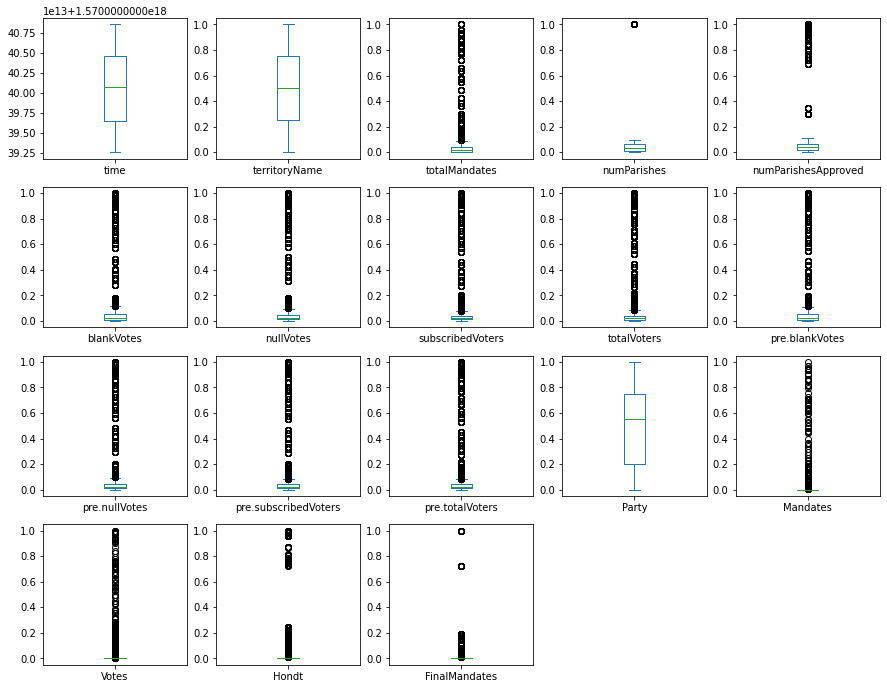

In [28]:
#Now we will check for outliers using boxplot
df.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))

array([[<AxesSubplot:title={'center':'time'}>,
        <AxesSubplot:title={'center':'territoryName'}>,
        <AxesSubplot:title={'center':'totalMandates'}>,
        <AxesSubplot:title={'center':'numParishes'}>,
        <AxesSubplot:title={'center':'numParishesApproved'}>],
       [<AxesSubplot:title={'center':'blankVotes'}>,
        <AxesSubplot:title={'center':'nullVotes'}>,
        <AxesSubplot:title={'center':'subscribedVoters'}>,
        <AxesSubplot:title={'center':'totalVoters'}>,
        <AxesSubplot:title={'center':'pre.blankVotes'}>],
       [<AxesSubplot:title={'center':'pre.nullVotes'}>,
        <AxesSubplot:title={'center':'pre.subscribedVoters'}>,
        <AxesSubplot:title={'center':'pre.totalVoters'}>,
        <AxesSubplot:title={'center':'Party'}>,
        <AxesSubplot:title={'center':'Mandates'}>],
       [<AxesSubplot:title={'center':'Votes'}>,
        <AxesSubplot:title={'center':'Hondt'}>,
        <AxesSubplot:title={'center':'FinalMandates'}>, <AxesSubplot:>,
   

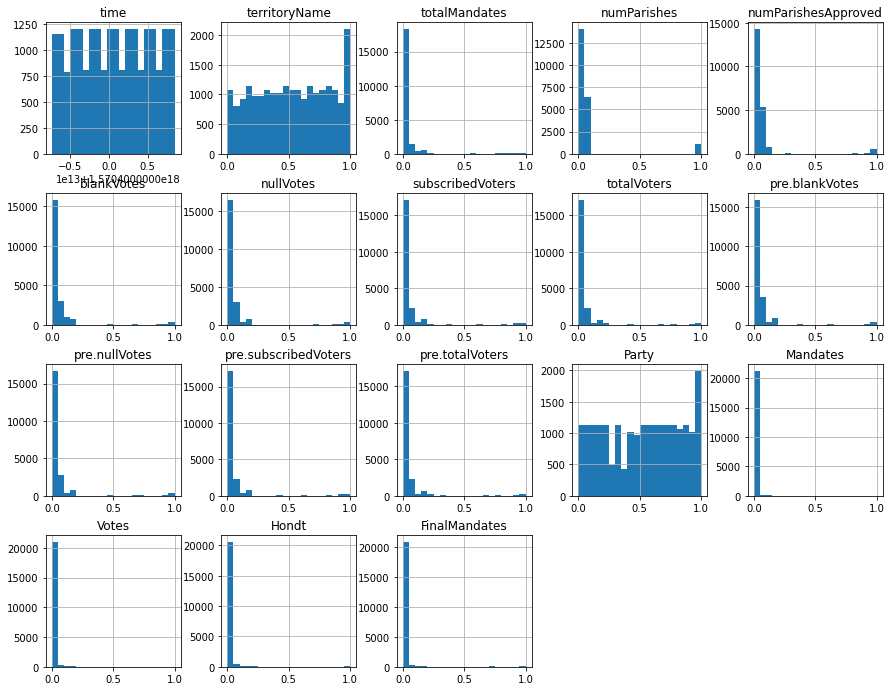

In [29]:
#Now plotting histogram for checking distribution of variables
df.hist(figsize=(15,15), layout=(5,5), bins=20)

In [57]:
#Removal of Outliers
#Metodo Z-score

#O z-score nos diz o quanto cada valor em nossa 
#distribuição se distancia da média em termos de desvio padrão.

from scipy import stats

z = stats.zscore(df)
z

,time,territoryName,totalMandates,numParishes,numParishesApproved,blankVotes,nullVotes,subscribedVoters,totalVoters,pre.blankVotes,pre.nullVotes,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Votes,Hondt,FinalMandates
0,-1.714632,0.982968,-0.368680,4.221354,1.405486,0.036163,0.184995,0.081932,0.057204,0.038339,0.158501,0.113892,0.078796,1.126269,-0.127891,1.419284,14.757327,15.259962
1,-1.714632,0.982968,-0.368680,4.221354,1.405486,0.036163,0.184995,0.081932,0.057204,0.038339,0.158501,0.113892,0.078796,0.799979,-0.127891,1.211248,12.691673,11.040237
2,-1.714632,0.982968,-0.368680,4.221354,1.405486,0.036163,0.184995,0.081932,0.057204,0.038339,0.158501,0.113892,0.078796,-1.484053,-0.127891,0.112293,2.363404,2.600786
3,-1.714632,0.982968,-0.368680,4.221354,1.405486,0.036163,0.184995,0.081932,0.057204,0.038339,0.158501,0.113892,0.078796,-1.320908,-0.127891,0.032984,1.727818,0.563677
4,-1.714632,0.982968,-0.368680,4.221354,1.405486,0.036163,0.184995,0.081932,0.057204,0.038339,0.158501,0.113892,0.078796,0.147398,-0.127891,0.020460,1.568922,1.582231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,1.697993,1.484214,-0.113202,-0.050006,0.027272,-0.180599,-0.166138,-0.183196,-0.194720,-0.182397,-0.160345,-0.172185,-0.192595,-0.178892,-0.127891,-0.166696,-0.178939,-0.163862
21639,1.697993,1.484214,-0.113202,-0.050006,0.027272,-0.180599,-0.166138,-0.183196,-0.194720,-0.182397,-0.160345,-0.172185,-0.192595,0.636834,-0.127891,-0.166761,-0.178939,-0.163862
21640,1.697993,1.484214,-0.113202,-0.050006,0.027272,-0.180599,-0.166138,-0.183196,-0.194720,-0.182397,-0.160345,-0.172185,-0.192595,-0.342037,-0.127891,-0.167513,-0.178939,-0.163862
21641,1.697993,1.484214,-0.113202,-0.050006,0.027272,-0.180599,-0.166138,-0.183196,-0.194720,-0.182397,-0.160345,-0.172185,-0.192595,1.289414,-0.127891,-0.167695,-0.178939,-0.163862


In [58]:
print(np.where(z<3))
print(df.shape)

#para definir um valor limite de outlier é escolhido que geralmente é 3,0. 
#Como 99,7% dos pontos de dados estão entre +/- 3 desvios padrão 
#(usando a abordagem de distribuição de Gauss).
#https://acervolima.com/detecte-e-remova-os-outliers-usando-python/

(array([    0,     0,     0, ..., 21642, 21642, 21642]), array([ 0,  1,  2, ..., 15, 16, 17]))
(21643, 18)


In [59]:
#Assign the value to df_new which are less the threshold value and removing the outliers
filtered_entries= (z < 3).all(axis=1)
df_new = df[filtered_entries]

In [60]:
print(df.shape)
print(df_new.shape)
df_new.tail()

(21643, 18)
(20446, 18)


,time,territoryName,totalMandates,numParishes,numParishesApproved,blankVotes,nullVotes,subscribedVoters,totalVoters,pre.blankVotes,pre.nullVotes,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Votes,Hondt,FinalMandates
21638,1570408501000000000,19,8,277,277,4995,3700,348061,177647,4235,3632,371931,190712,9,0,332,0,0
21639,1570408501000000000,19,8,277,277,4995,3700,348061,177647,4235,3632,371931,190712,14,0,326,0,0
21640,1570408501000000000,19,8,277,277,4995,3700,348061,177647,4235,3632,371931,190712,8,0,256,0,0
21641,1570408501000000000,19,8,277,277,4995,3700,348061,177647,4235,3632,371931,190712,18,0,239,0,0
21642,1570408501000000000,19,8,277,277,4995,3700,348061,177647,4235,3632,371931,190712,5,0,118,0,0


In [55]:
#Assign the value to df_new which are less the threshold value and removing the outliers
df_new = df[(z<3).all(axis = 1)]
df=df_new

/var/folders/l5/26f7vmhn489dq9k00762x2bw0000gn/T/ipykernel_46058/1594649035.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_new = df[(z<3).all(axis = 1)]


In [64]:
#funcao remover outliers com z-score

df = catalog.load('encode_party_dataset')
def func_remove_outliers_zscore(df):
    z = stats.zscore(df)
    df = df[(z<3).all(axis = 1)]
    
    return df

2022-06-27 23:38:51,864 - kedro.io.data_catalog - INFO - Loading data from `encode_party_dataset` (CSVDataSet)...


In [65]:
#testando a func_remove_outliers_zscore

# Test function
df_without_outliers = func_remove_outliers_zscore(catalog.load('encode_party_dataset'))
df_without_outliers

2022-06-27 23:38:56,799 - kedro.io.data_catalog - INFO - Loading data from `encode_party_dataset` (CSVDataSet)...


,time,territoryName,totalMandates,numParishes,numParishesApproved,blankVotes,nullVotes,subscribedVoters,totalVoters,pre.blankVotes,pre.nullVotes,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Votes,Hondt,FinalMandates
21,1570392602000000000,0,0,147,12,186,101,11953,6371,124,111,12511,6826,15,0,2405,7,6
22,1570392602000000000,0,0,147,12,186,101,11953,6371,124,111,12511,6826,17,0,2187,7,7
23,1570392602000000000,0,0,147,12,186,101,11953,6371,124,111,12511,6826,1,0,476,1,2
24,1570392602000000000,0,0,147,12,186,101,11953,6371,124,111,12511,6826,2,0,391,1,1
25,1570392602000000000,0,0,147,12,186,101,11953,6371,124,111,12511,6826,11,0,152,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,1570408501000000000,19,8,277,277,4995,3700,348061,177647,4235,3632,371931,190712,9,0,332,0,0
21639,1570408501000000000,19,8,277,277,4995,3700,348061,177647,4235,3632,371931,190712,14,0,326,0,0
21640,1570408501000000000,19,8,277,277,4995,3700,348061,177647,4235,3632,371931,190712,8,0,256,0,0
21641,1570408501000000000,19,8,277,277,4995,3700,348061,177647,4235,3632,371931,190712,18,0,239,0,0


time                       AxesSubplot(0.125,0.749828;0.133621x0.130172)
territoryName           AxesSubplot(0.285345,0.749828;0.133621x0.130172)
totalMandates            AxesSubplot(0.44569,0.749828;0.133621x0.130172)
numParishes             AxesSubplot(0.606034,0.749828;0.133621x0.130172)
numParishesApproved     AxesSubplot(0.766379,0.749828;0.133621x0.130172)
blankVotes                 AxesSubplot(0.125,0.593621;0.133621x0.130172)
nullVotes               AxesSubplot(0.285345,0.593621;0.133621x0.130172)
subscribedVoters         AxesSubplot(0.44569,0.593621;0.133621x0.130172)
totalVoters             AxesSubplot(0.606034,0.593621;0.133621x0.130172)
pre.blankVotes          AxesSubplot(0.766379,0.593621;0.133621x0.130172)
pre.nullVotes              AxesSubplot(0.125,0.437414;0.133621x0.130172)
pre.subscribedVoters    AxesSubplot(0.285345,0.437414;0.133621x0.130172)
pre.totalVoters          AxesSubplot(0.44569,0.437414;0.133621x0.130172)
Party                   AxesSubplot(0.606034,0.4374

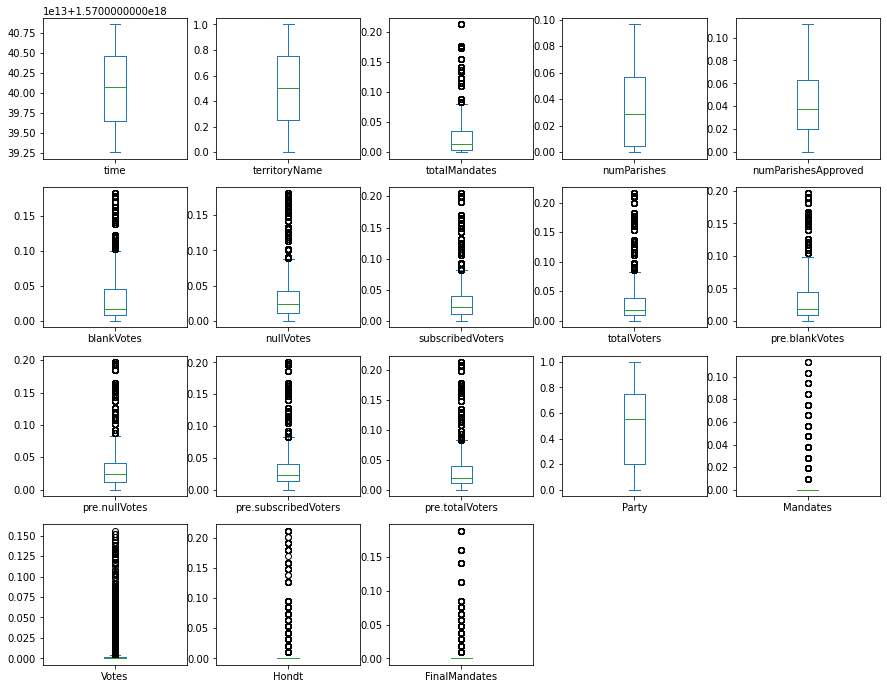

In [17]:
#Now we will check for outliers using boxplot
df.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))

In [18]:
#Modelo
#Split train and test 

X = df.drop(columns=['FinalMandates'])
y = df['FinalMandates']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size = 0.3, random_state = 9999, stratify = y
    )

In [22]:
#defining a function to find model score,r2 score for the given dataset
model=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor()]

for m in model:
    m.fit(X_train, y_train)
    score = m.score(X_train, y_train)
    predm=m.predict(X_test)
    print('Score of',m,'is:',score)
    print('MAE:',mean_absolute_error(y_test,predm))
    print('MSE:',mean_squared_error(y_test,predm))
    print('RMSE:',np.sqrt(mean_squared_error(y_test,predm)))
    print('R2 score:',r2_score(y_test,predm))
    print('*'*100)
    print('\n') 

Score of LinearRegression() is: 0.999098745003644
MAE: 0.00044024873323069243
MSE: 2.5990834341482213e-07
RMSE: 0.0005098120667607056
R2 score: 0.9990987625282117
****************************************************************************************************


Score of DecisionTreeRegressor() is: 1.0
MAE: 1.7906056668560077e-17
MSE: 3.0945885675128215e-33
RMSE: 5.56290263038355e-17
R2 score: 1.0
****************************************************************************************************


Score of RandomForestRegressor() is: 0.9999997675084378
MAE: 2.7683619295444407e-07
MSE: 1.5669973185786934e-10
RMSE: 1.2517976348350772e-05
R2 score: 0.9999994566404898
****************************************************************************************************




In [52]:
%reload_kedro

2022-06-27 23:35:15,090 - root - INFO - No path argument was provided. Using: /Users/jessicaoliveira/Projects/projeto_ds_kedro/project_ds_kedro
2022-06-27 23:35:15,542 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.
2022-06-27 23:35:16,568 - root - INFO - ** Kedro project project_ds_kedro
2022-06-27 23:35:16,569 - root - INFO - Defined global variable `context`, `session`, `catalog` and `pipelines`


In [54]:
a = catalog.load('election_cleaned_dataset')
a

2022-06-27 23:36:04,558 - kedro.io.data_catalog - INFO - Loading data from `election_cleaned_dataset` (CSVDataSet)...


,time,territoryName,totalMandates,numParishes,numParishesApproved,blankVotes,nullVotes,subscribedVoters,totalVoters,pre.blankVotes,pre.nullVotes,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Votes,Hondt,FinalMandates
0,1570392602000000000,16,0,3092,1081,9652,8874,752529,386497,8317,8171,813743,428546,17,0,147993,94,106
1,1570392602000000000,16,0,3092,1081,9652,8874,752529,386497,8317,8171,813743,428546,15,0,128624,81,77
2,1570392602000000000,16,0,3092,1081,9652,8874,752529,386497,8317,8171,813743,428546,1,0,26307,16,19
3,1570392602000000000,16,0,3092,1081,9652,8874,752529,386497,8317,8171,813743,428546,2,0,18923,12,5
4,1570392602000000000,16,0,3092,1081,9652,8874,752529,386497,8317,8171,813743,428546,11,0,17757,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,1570408501000000000,19,8,277,277,4995,3700,348061,177647,4235,3632,371931,190712,9,0,332,0,0
21639,1570408501000000000,19,8,277,277,4995,3700,348061,177647,4235,3632,371931,190712,14,0,326,0,0
21640,1570408501000000000,19,8,277,277,4995,3700,348061,177647,4235,3632,371931,190712,8,0,256,0,0
21641,1570408501000000000,19,8,277,277,4995,3700,348061,177647,4235,3632,371931,190712,18,0,239,0,0
